In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
n_tab = np.array([5, 10, 15, 20])

X_1 = np.linspace(-5, 5, n_tab[0] + 1)
X_2 = np.linspace(-5, 5, n_tab[1] + 1)
X_3 = np.linspace(-5, 5, n_tab[2] + 1)
X_4 = np.linspace(-5, 5, n_tab[3] + 1)

def F(x):
    return np.exp(-x**2)

Y_1 = np.zeros(n_tab[0] + 1)
Y_2 = np.zeros(n_tab[1] + 1)
Y_3 = np.zeros(n_tab[2] + 1)
Y_4 = np.zeros(n_tab[3] + 1)

for i in range(0, n_tab[0] + 1):
    Y_1[i] = F(X_1[i])
for i in range(0, n_tab[1] + 1):
    Y_2[i] = F(X_2[i])
for i in range(0, n_tab[2] + 1):
    Y_3[i] = F(X_3[i])
for i in range(0, n_tab[3] + 1):
    Y_4[i] = F(X_4[i])

In [3]:
psi_1 = np.zeros(n_tab[0] + 1)
psi_2 = np.zeros(n_tab[1] + 1)
psi_3 = np.zeros(n_tab[2] + 1)
psi_4 = np.zeros(n_tab[3] + 1)

In [4]:
def Lagrange_int(x, w, ww, n):
    temp = np.zeros(n + 1)
    suma = 0
    for k in range(0, n + 1):
        w_n = 1
        mian = 1
        for i in range(0, n + 1):
            if k == i:
                continue
            w_n *= (x - w[i])
            mian *= (w[k] - w[i]) 
        temp[k] = w_n / mian
        suma += temp[k] * ww[k]
    return suma

In [5]:
X_1

array([-5., -3., -1.,  1.,  3.,  5.])

In [6]:
Lagrange_int(2.2, X_1, Y_1, n_tab[0])

0.16076437815261987

In [7]:
X = np.linspace(-5, 5, 250)
Y_1L = np.zeros(250)
Y_2L = np.zeros(250)
Y_3L = np.zeros(250)
Y_4L = np.zeros(250)

for i, x in enumerate(X):
    Y_1L[i] = Lagrange_int(x, X_1, Y_1, n_tab[0])
    Y_2L[i] = Lagrange_int(x, X_2, Y_2, n_tab[1])
    Y_3L[i] = Lagrange_int(x, X_3, Y_3, n_tab[2])
    Y_4L[i] = Lagrange_int(x, X_4, Y_4, n_tab[3])

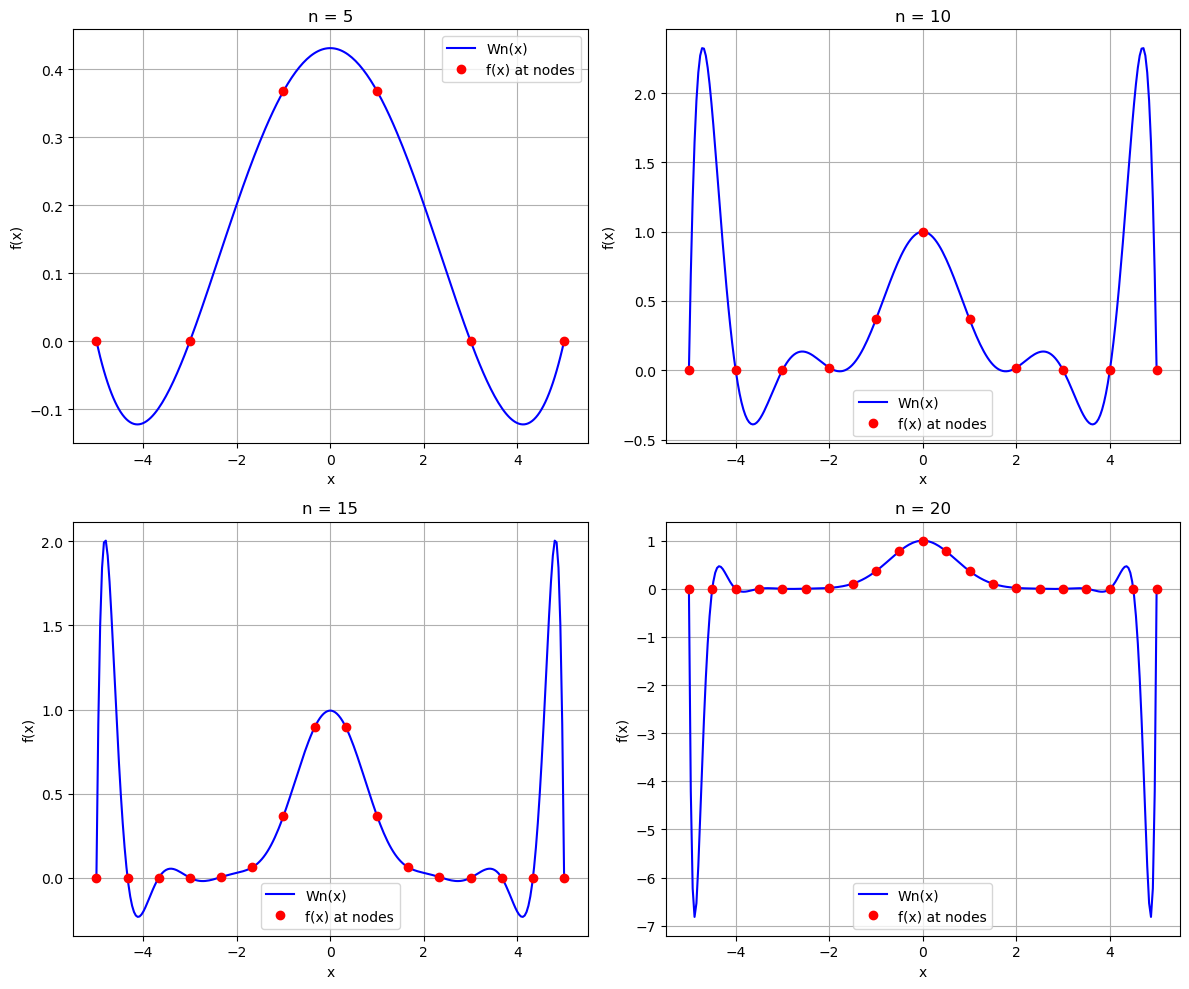

In [8]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(X, Y_1L, color='blue', label='Wn(x)')
plt.plot(X_1, Y_1, color='red', marker='o', linestyle='None', label='f(x) at nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'n = {5}')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(X, Y_2L, color='blue', label='Wn(x)')
plt.plot(X_2, Y_2, color='red', marker='o', linestyle='None', label='f(x) at nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'n = {10}')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(X, Y_3L, color='blue', label='Wn(x)')
plt.plot(X_3, Y_3, color='red', marker='o', linestyle='None', label='f(x) at nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'n = {15}')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(X, Y_4L, color='blue', label='Wn(x)')
plt.plot(X_4, Y_4, color='red', marker='o', linestyle='None', label='f(x) at nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'n = {20}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
def new_x(x_min, x_max, n, m): # m = 0, 1, ... , n
    return 0.5 * ((x_max - x_min) * np.cos(np.pi * (2*m+1) / (2*n+2)) + (x_min + x_max))

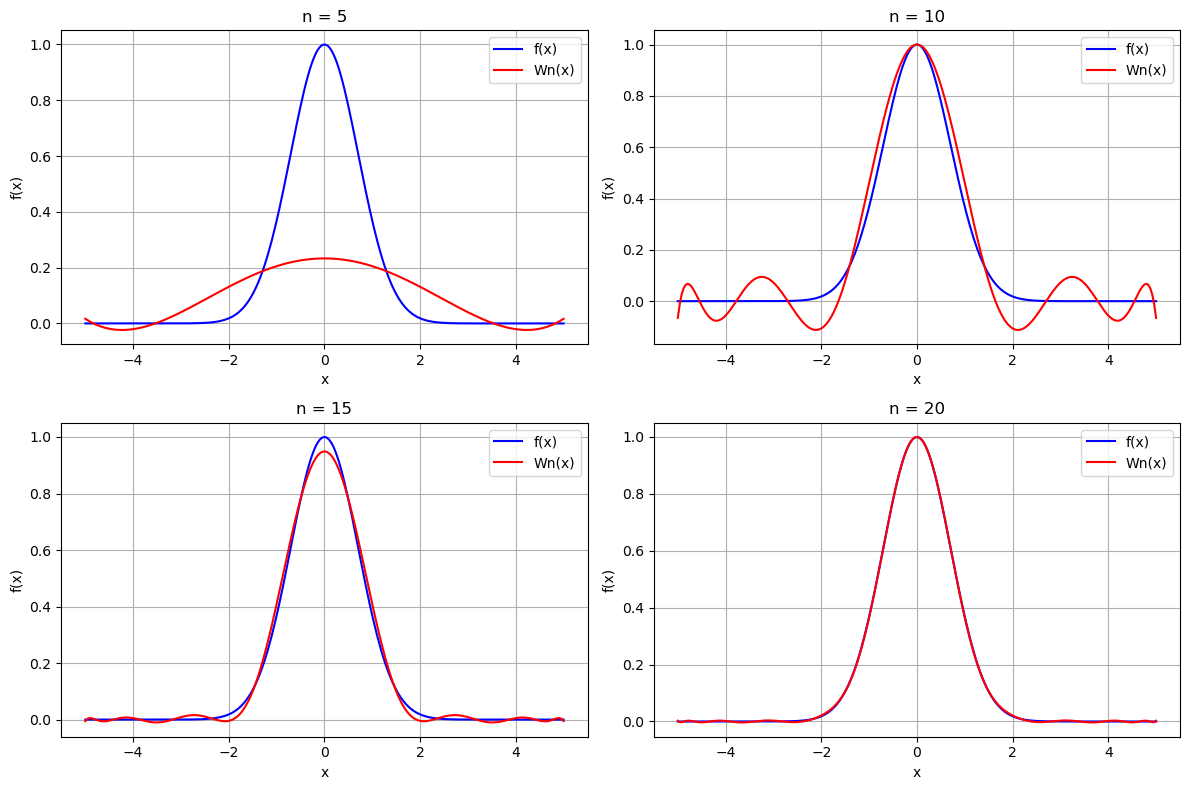

In [10]:
plt.figure(figsize=(12, 8))

for i, n in enumerate(n_tab, start=1):
    X_nodes = np.array([new_x(-5, 5, n, m) for m in range(n + 1)])
    Y_nodes = F(X_nodes)
    
    Y_L = np.array([Lagrange_int(x, X_nodes, Y_nodes, n) for x in X])
    
    plt.subplot(2, 2, i)
    plt.plot(X, F(X), label='f(x)', color='blue')
    plt.plot(X, Y_L, label='Wn(x)', color='red')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'n = {n}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()